# Crop Recommendation using Machine Learning

Prepared by : Swaminathan ayyappan

Email : swamynathanayyappan@gmail.com

LinkedIn : https://www.linkedin.com/in/swaminathan-ayyappan-60b685175/

Problem Description :

  Provided an input data which contains of features like N,P,K,temperature,humididty,ph,rainfall and crop.And their Description is given below :


  
  N - ratio of Nitrogen content in soil
  
  P - ratio of Phosphorus content in soil
  
  K - ratio of Potassium content in soil
  
  temperature - temperature in degree Celsius
  
  humidity - relative humidity in %
  
  ph - ph value of the soil
  
  rainfall - rainfall in mm
  
  crop - Suitable crop to grow (target variable)

So our work is to predict which type of crop should we want to prefer/recommend based on those input features
 






## **Importing Libraries**

In [ ]:
import pandas as pd #Importing pandas
# import seaborn as sns #Importing seaborn
# import matplotlib.pyplot as plt #Importing matplotlib 
# from google.colab import files #Importing files 
# %matplotlib inline 
df=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/train_set_label.csv") #Reading the training data using pandas.

: 

In [ ]:
#Reviewing the first five entries in the training data(df).
df.head()

: 

# **Exploratory Data Analysis**

In [4]:
#Checking for any null values inside the training dataset(df).
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

In [5]:
#Identifiying how many number of categories present in the crop column of the training dataset(df).
df.crop.nunique()

22

In [6]:
#Identifying how many times each categories are present in the crop column.
df['crop'].value_counts()

orange         75
mothbeans      75
cotton         75
apple          75
watermelon     75
rice           75
coffee         75
chickpea       75
kidneybeans    75
jute           75
coconut        75
grapes         75
blackgram      75
pomegranate    75
mango          75
papaya         75
muskmelon      75
pigeonpeas     75
lentil         75
maize          75
mungbean       75
banana         75
Name: crop, dtype: int64

In [7]:
df.describe() #Gives an statistical analysis of the training data.

,N,P,K,temperature,humidity,ph,rainfall
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,50.370308,53.419241,48.111081,25.647214,71.563115,6.485583,103.965778
std,36.743966,33.320501,50.537044,5.005005,22.198130,0.765865,55.510324
min,0.000000,5.000000,5.000000,9.467960,14.273280,3.525366,20.360011
25%,21.000000,27.000000,20.552276,22.807269,60.120113,5.986160,65.025621
50%,37.000000,52.000000,31.575398,25.656980,80.547206,6.426118,95.246217
75%,84.738202,68.000000,49.000000,28.529953,90.003702,6.924943,127.887636
max,136.000000,145.000000,205.000000,42.936054,99.981876,9.935091,298.560117


In [8]:
df.info() #Provides the information about the training data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1650 non-null   float64
 1   P            1650 non-null   float64
 2   K            1650 non-null   float64
 3   temperature  1650 non-null   float64
 4   humidity     1650 non-null   float64
 5   ph           1650 non-null   float64
 6   rainfall     1650 non-null   float64
 7   crop         1650 non-null   object 
dtypes: float64(7), object(1)
memory usage: 103.2+ KB


In [9]:
df.shape #Gives the number of rows and columns in the training data.

(1650, 8)

In [10]:
df.corr() #Gives the pearson correlation of each features on the training data.

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.232892,-0.143022,0.014088,0.185919,0.080087,0.049705
P,-0.232892,1.000000,0.735456,-0.133283,-0.119861,-0.145958,-0.064344
K,-0.143022,0.735456,1.000000,-0.162041,0.188512,-0.193294,-0.054222
temperature,0.014088,-0.133283,-0.162041,1.000000,0.201797,-0.018037,0.000306
humidity,0.185919,-0.119861,0.188512,0.201797,1.000000,-0.011764,0.105829
ph,0.080087,-0.145958,-0.193294,-0.018037,-0.011764,1.000000,-0.138397
rainfall,0.049705,-0.064344,-0.054222,0.000306,0.105829,-0.138397,1.000000


# **Visualization using seaborn**

c:\Users\swaminathan.ayyappan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='N', ylabel='Density'>

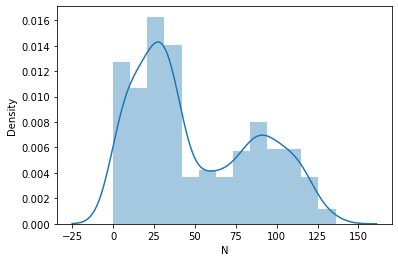

In [11]:
sns.distplot(df['N']) #Verifying distribution of the N column in the training data.

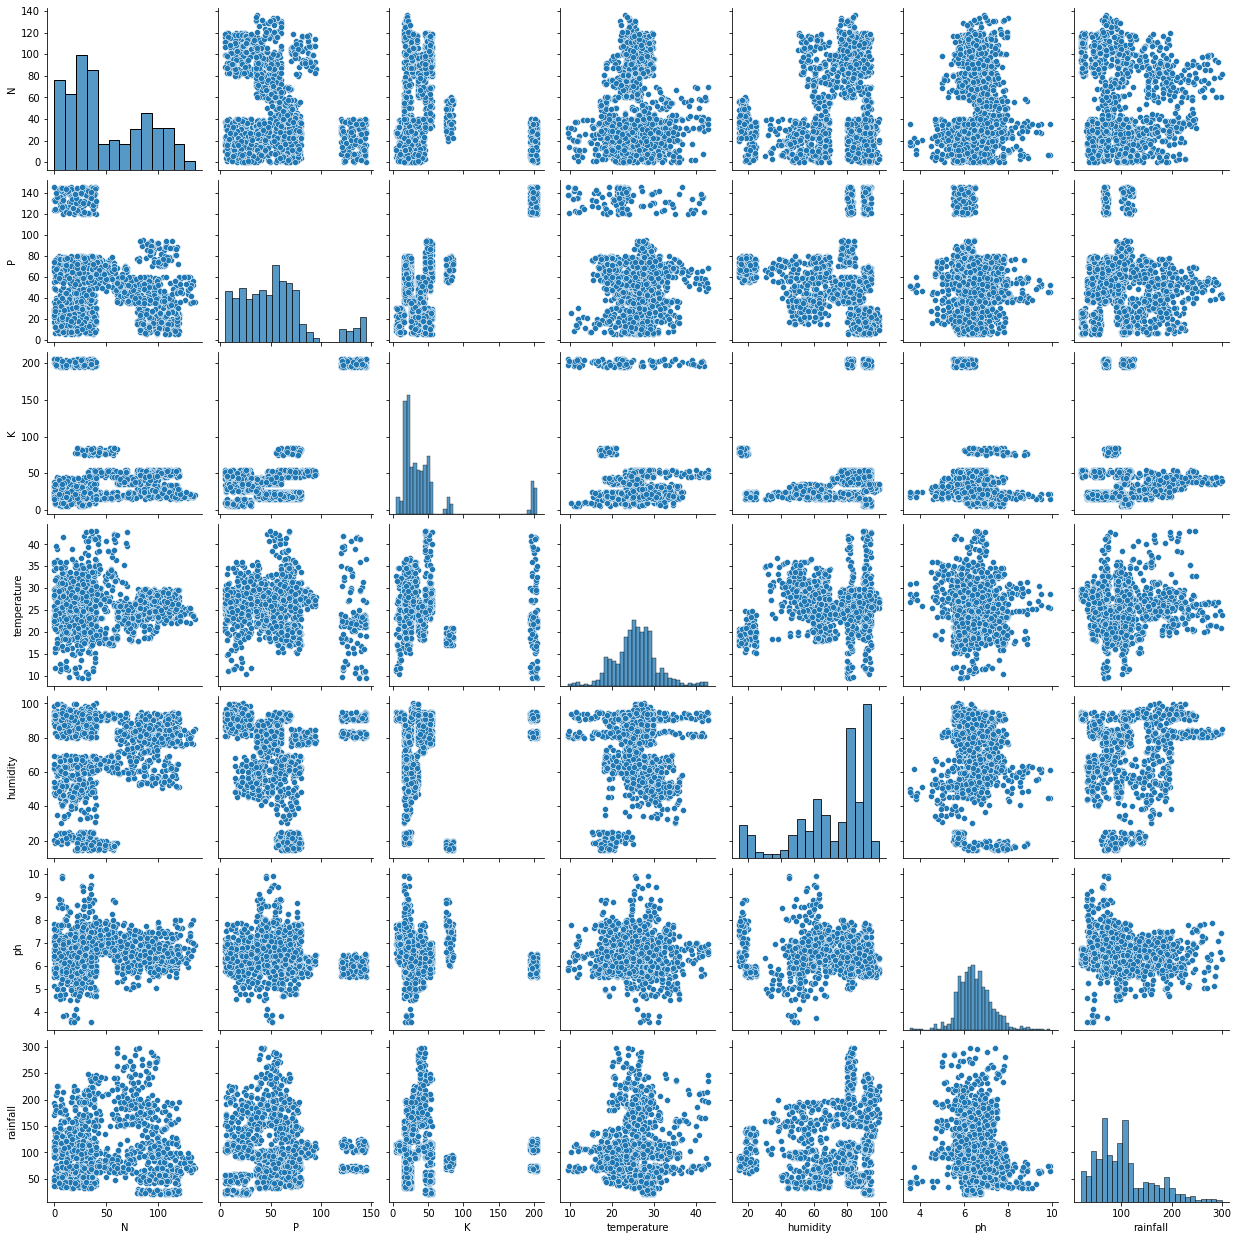

In [12]:
sns.pairplot(df) #Gives an entire visualization chart about the training data.

c:\Users\swaminathan.ayyappan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


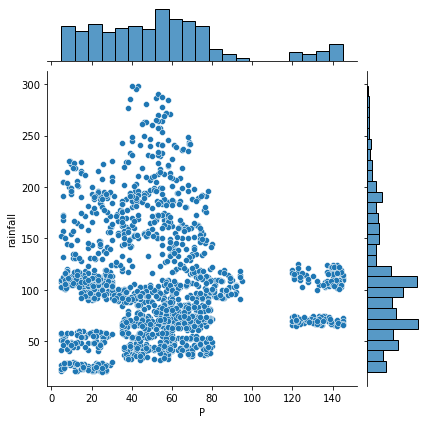

In [13]:
sns.jointplot('P','rainfall',data=df) #Compares and visualizes the P and rainfall column on the training data.

c:\Users\swaminathan.ayyappan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


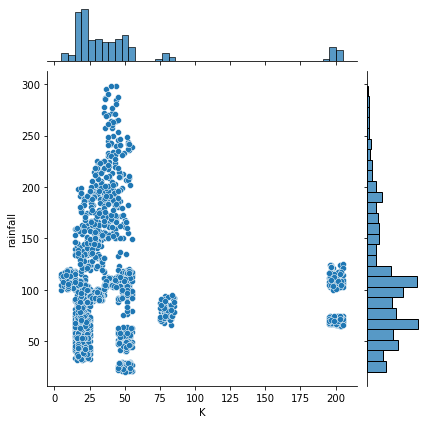

In [14]:
sns.jointplot('K','rainfall',data=df) #Compares and visualizes the K and rainfall column on the training data.

c:\Users\swaminathan.ayyappan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


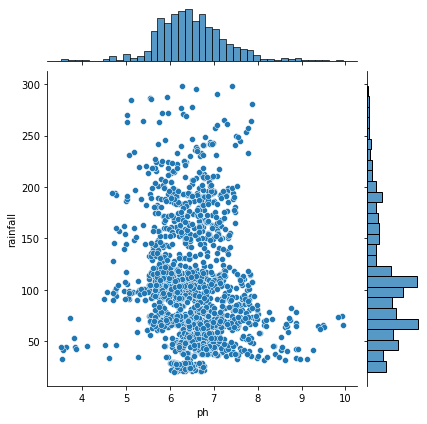

In [15]:
sns.jointplot('ph','rainfall',data=df) #Compares and visualizes the ph and rainfall column on the training data.

# **Dependent and Independent Features Selection**

In [16]:
X=df.iloc[:,0:7].values #Indepent features converted into an numpy array.
y=df.iloc[:,7].values #Dependent features converted into an numpy array.

In [17]:
X #Independent features.

array([[ 17.        , 136.        , 196.        , ...,  90.49939035,
          5.88215599, 103.0548094 ],
       [ 49.        ,  69.        ,  82.        , ...,  15.36143547,
          7.26311855,  81.78710463],
       [ 74.        ,  49.        ,  38.        , ...,  71.4509053 ,
          7.4880144 , 164.4970373 ],
       ...,
       [ 35.        , 135.        , 199.        , ...,  80.54942557,
          6.40071975,  69.39630398],
       [ 97.        ,  35.        ,  26.        , ...,  53.74144743,
          6.33461025, 166.2549307 ],
       [ 19.6655055 ,  53.22183517,  21.55632967, ...,  81.15823805,
          6.81671231,  42.42737423]])

In [18]:
y #Dependent features.

array(['apple', 'chickpea', 'jute', ..., 'grapes', 'coffee', 'mungbean'],
      dtype=object)

**Encoding the target variable (crop) on the training data**

In [19]:
from sklearn.preprocessing import LabelEncoder #Importing labelencoder from scikit learn.
le=LabelEncoder() #Instantiating the labelencoder class.

In [20]:
y=le.fit_transform(y) #Encoding the dependent features into numerical form with the use of label encoder.

In [20]:
y #Dependent features after performing label encoding.

array([ 0,  3,  8, ...,  7,  5, 14])

In [21]:
from collections import Counter #Importing counter from collections.
print(Counter(y)) #Printing the presence of each distinct values on the dependent features.

Counter({0: 75, 3: 75, 8: 75, 5: 75, 21: 75, 4: 75, 7: 75, 12: 75, 13: 75, 19: 75, 14: 75, 1: 75, 2: 75, 16: 75, 20: 75, 10: 75, 11: 75, 18: 75, 9: 75, 17: 75, 15: 75, 6: 75})


# **Train and test split**

In [22]:
from sklearn.model_selection import train_test_split #Importing train and test split from sklearn.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) #Performing train test split with test size of 20% and random state as 101

# **Naive bayes classification model**

In [23]:
#The reason for using naive bayes algorithm is it deals in predicting output class which has more than two features based upon the probability calculated using baye's theorem.
from sklearn.naive_bayes import GaussianNB #Importing Naive bayes from sklearn. 

In [24]:
nb_classifier=GaussianNB() #Instantiating the naive bayes classifier class.

# **Model training**

In [25]:
nb_classifier.fit(X_train,y_train) #training the model with the training data.

GaussianNB()

# **Importing Test data**

In [26]:
#Importing the test data.
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/test_set_label.csv')

In [27]:
test_data=test_data.iloc[:,:].values #Converts the test data into an numpy array.

In [28]:
test_data #test data after converting it into an numpy array.

array([[ 22.        ,  51.        ,  16.        , ...,  61.34900107,
          8.6395862 ,  70.10472076],
       [130.20691026,  59.20691026,  18.58617949, ...,  82.35612389,
          6.70758258,  91.43199234],
       [ 28.        ,  27.        ,  34.        , ...,  50.69693751,
          6.52665434,  95.04871605],
       ...,
       [ 28.8120415 ,  18.93734717,  30.74938867, ...,  95.47331145,
          5.72011616, 143.30679625],
       [ 33.65935511, 128.89376326, 204.77655918, ...,  92.81939171,
          6.05349932, 107.95033245],
       [ 29.        ,  36.        ,  25.        , ...,  88.4393979 ,
          7.13027866,  48.56690235]])

# **Making predictions using the trained model**

In [29]:
#making predictions from the trained naive bayes model using the test data.
predictions=nb_classifier.predict(test_data)

In [30]:
predictions #Reviewing the predictions

array([13,  6, 12, 10, 14,  5, 10,  6, 10, 10,  8, 13, 16,  1,  4, 15,  7,
        5, 21, 14,  4, 20, 13, 11,  0, 16, 20, 21, 19, 13,  9, 14,  1, 17,
        2,  3,  9,  4, 10, 17,  7,  7, 20,  3,  7, 18, 21, 18, 21, 12, 11,
       12,  7, 18, 20,  9,  0,  4, 21,  0, 14,  5, 21, 14,  0,  9, 16,  7,
       21,  4, 11, 19,  6,  0, 11,  8, 13,  6,  6, 18, 18, 13,  1,  0,  9,
        6,  1,  3,  0, 11,  7, 16, 19,  2, 21, 13,  7,  0,  3, 16, 16, 15,
        4,  8, 16,  6, 18,  6,  6, 12, 19,  3, 11, 13,  5,  9,  1,  4, 10,
        8,  2,  5,  9, 14,  6, 17, 21,  4, 17,  2, 20, 13, 15, 13,  8, 14,
       19, 18,  5,  5, 12,  8,  8,  6,  3,  3, 17, 13, 16,  0,  5, 14, 11,
        3,  2, 10, 16,  9, 19, 17,  2, 12, 19,  8, 18, 13,  3, 15,  3, 10,
       12,  4,  1,  5, 20, 12, 21, 21,  8,  4, 18, 17, 20, 16,  6,  2, 18,
       12, 12,  2,  8, 16, 17, 11, 11,  6, 17, 15,  0,  5,  4, 21, 15, 15,
        4,  3, 11, 14,  6, 15, 13, 20, 10, 20,  9,  7, 18, 10,  8,  7, 11,
       11, 15, 12, 14,  1

**Converting the predictions into an dataframe using pandas**

In [31]:
#Converting the predictions into an pandas dataframe.
predictions=pd.DataFrame(predictions,columns=['prediction'])

In [32]:
#Reviewing the predictions dataframe.
predictions.head()

,prediction
0,13
1,6
2,12
3,10
4,14


**Decoding the predictions into text**

In [33]:
#A function that is used in decoding the predictions from numerical form into character form for understanding of the predictions made by the classifier model.
def conversion(n):
  crop_names={0:'apple',1:'banana',2:'blackgram',3:'chickpea',4:'coconut',5:'coffee',6:'cotton',7:'grapes',8:'jute',9:'kidneybeans',
              10:'lentil',11:'maize',12:'mango',13:'mothbeans',14:'mungbean',15:'muskmelon',16:'orange',17:'papaya',18:'pigeonpeas',19:'pomegranate',20:'rice',21:'watermelon'}
  return crop_names[n]

In [34]:
#Applying the conversion function and converting it into an dataframe.
final_result=pd.DataFrame(predictions['prediction'].apply(conversion))

In [35]:
final_result.head()

,prediction
0,mothbeans
1,cotton
2,mango
3,lentil
4,mungbean


# **Converting the final predictions dataframe into an csv file**

In [36]:
#Converting the predictions dataframe into an csv file and at last downloading the csv file 
final_result.to_csv('Final predictions.csv',index=False)
files.download('Final predictions.csv')#Note : This line of code works only on google colab

NameError: name 'files' is not defined

In [37]:
import pickle
pickle.dump(nb_classifier, open('Croprecommendationmodel.pkl','wb'))